In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Used for normalizing the Amount column 
from sklearn.preprocessing import StandardScaler

# for spliting the data into train/test sets
from sklearn.model_selection import train_test_split

# Importing the XGBoost algorithm
from xgboost import XGBClassifier

# Importing metrics to assess the model
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, precision_score, recall_score, confusion_matrix

# Importing Seaborn to plot the confusion-matrix
import seaborn as sns

#Importing SMOTE to over-sample the dataset
#!pip install imblearn
from imblearn.over_sampling import SMOTE

In [2]:
# Importing the data
df = pd.read_csv("../creditcard.csv")

### Exploratory data analysis

In [3]:
# Exploring the first 5 lignes in the dataset.
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Exploring the list of te dataset columns.
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# The number of null values in the dataset for each column.
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##### The variable amount has a range of values from 0 to 25691.16. in order to reduce this range we'll normalize its values.

In [8]:
# Normalizing the column Amount.
sc = StandardScaler()
df['NormalizedAmount'] = sc.fit_transform(df['Amount'].values.reshape(-1,1))

**We won't need the variables *Time* and *Amount* so we'll drop them from the dataframe.**

In [9]:
# droping the columns time and Amount.
df.drop(['Time', 'Amount'], axis=1, inplace = True)

In [10]:
# checking tha data distribution
prct_classes = df.value_counts(df['Class'], normalize= True)
prct_classes

Class
0    0.998273
1    0.001727
dtype: float64

Text(0, 0.5, 'frequency')

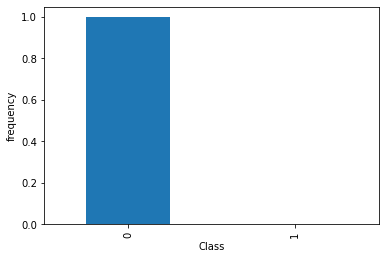

In [11]:
# ploting the data distribution.
prct_classes.plot(kind='bar')
plt.ylabel('frequency')

**The dataset is highly unbalanced the minority class which is the fraudulent transactions constitute only 0.1727% of the dataset's transactions**

To resolve this issue we have two possible solutions **oversampling the minority class** or **under sampling the abundant one**.

For our case we'll be comparing the performance of **XGBoost** on the original dataset against its performance after over-sampling the dataset with SMOTE.

## XGBoost without oversampling

In [12]:
y = df['Class']
X = df.drop(['Class'], axis = 1)

In [13]:
# spliting the data into train/test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 25)

In [14]:
# training the model.
model = XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 we'll be using the precision-recall curve to evalute this model. because it's a useful measure of success of prediction when the classes are very imbalanced.

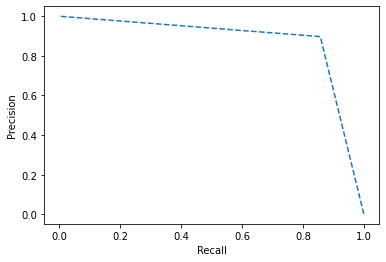

AUPRC:  0.8773100039194143


In [15]:
# ploting the precision-recall curve and calculating the AUPRC 'Area under precision recall curve'.
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
plt.plot(recall, precision, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
# calculate precision-recall AUC
print('AUPRC: ', auc(recall, precision))

In [16]:
# calculating the different metrics.
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print("Model Accuracy : ", accuracy)
print('Precision on testing set:', precision)
print('Recall on testing set:', recall)

Model Accuracy :  0.9995259997893332
Precision on testing set: 0.897196261682243
Recall on testing set: 0.8571428571428571


<AxesSubplot:>

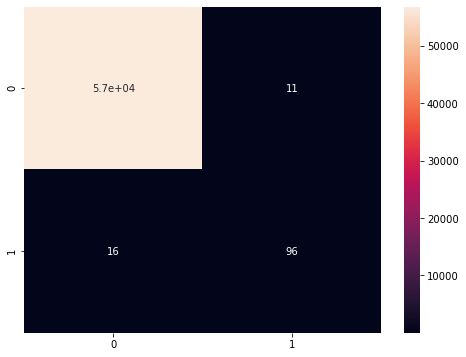

In [17]:
# plotting the confusion-matrix
graph = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
ax= plt.subplot()
sns.heatmap(graph, annot=True, ax = ax)

## XGBoost with over-sampling

In [18]:
X_resample, y_resample = SMOTE().fit_resample(X, y)

In [19]:
y_resample.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size= 0.20, random_state= 25)

In [21]:
model_resample = XGBClassifier()
model_resample.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:32:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
predictions = model_resample.predict(X_test)

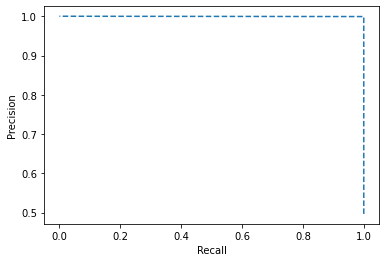

AUPRC:  0.9995973748253513


In [23]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
plt.plot(recall, precision, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
# calculate precision-recall AUC
print('AUPRC: ', auc(recall, precision))

In [24]:
print(type(precision))

<class 'numpy.ndarray'>


In [25]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print("Model Accuracy : ", accuracy)
print('Precision on testing set:', precision)
print('Recall on testing set:', recall)

Model Accuracy :  0.9995955190545698
Precision on testing set: 0.9992036666725654
Recall on testing set: 0.9999822899141061


<AxesSubplot:>

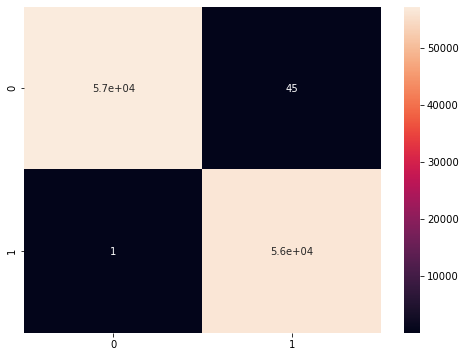

In [26]:
graph = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
ax= plt.subplot()
sns.heatmap(graph, annot=True, ax = ax)

In [28]:
model.save_model('../Model/Credit Card Classifier.h3')
model_resample.save_model('../Model/Credit Card Classifier-oversampled.h3')